# Introduction

Customer churn is a significant concern for businesses, particularly in industries with high competition and low switching costs, such as telecommunications. Churn occurs when customers stop using a product or service, leading to lost revenue and increased costs for acquiring new customers. Understanding the factors that contribute to churn and being able to predict it can greatly benefit businesses by enabling proactive measures to retain customers.

This project aims to address the challenge of customer churn prediction by analyzing a real-world telecommunications dataset. Using machine learning techniques, the goal is to build a predictive model that can identify customers at risk of churning. This will help businesses implement targeted retention strategies and improve overall customer satisfaction. The code in this repository provides a detailed approach to data exploration, feature engineering, model selection, and evaluation to achieve accurate churn prediction.


# Importing Libraries

> The initial step in this project was importing all relevant libraries required for data analysis, visualization, and machine learning. These libraries form the backbone of our project and allow us to perform operations like data manipulation, statistical analysis, data visualization, and building machine learning models. By importing these libraries at the beginning, we ensure our code has access to all the necessary tools for the subsequent stages of the project.



# Problem Statement:

 The goal is to analyze a telecommunications dataset and create a machine learning model that can accurately predict customer churn. Churn refers to the phenomenon where customers leave or discontinue a service. Predicting customer churn is crucial for businesses to identify at-risk customers and take proactive measures to retain them. By developing a robust predictive model, we aim to assist businesses in reducing customer churn and improving customer retention.

The dataset source is (https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# Data Loading and Cleaning

In [8]:
data = pd.read_csv("/content/archive (2).zip");

In [9]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


The 'customerID' column is dropped because it does not contain predictive information and could lead to overfitting due to its uniqueness.
Removing it helps reduce model complexity and improves generalization.

In [10]:
data.drop('customerID', axis = 1, inplace = True)

In [11]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

The dataset has been thoroughly examined, and there are no null (missing) values in any of the columns. This indicates that the data is complete and ready for further analysis without the need for additional imputation or cleaning related to missing data.

In [12]:
data.shape

(7043, 20)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


The 'TotalCharges' column contains values that represent numbers, but the data type is not recognized as a numerical type. Therefore, it's necessary to convert this column to a numerical data type for proper analysis and computation.

In [14]:
data['TotalCharges'] = data['TotalCharges'].apply(lambda x: pd.to_numeric(x, errors='coerce'))

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Next lets check if there are any null values in TotalCharges now.

In [16]:
data['TotalCharges'].isnull().sum()

11

It's essential to eliminate the 11 missing values from the dataset before proceeding with analysis or modeling.

In [17]:
data = data.dropna().reset_index(drop=True)

In [18]:
for column in data.columns:
    print(column + ":")
    print(data[column].unique())

gender:
['Female' 'Male']
SeniorCitizen:
[0 1]
Partner:
['Yes' 'No']
Dependents:
['No' 'Yes']
tenure:
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:
['No' 'Yes']
MultipleLines:
['No phone service' 'No' 'Yes']
InternetService:
['DSL' 'Fiber optic' 'No']
OnlineSecurity:
['No' 'Yes' 'No internet service']
OnlineBackup:
['Yes' 'No' 'No internet service']
DeviceProtection:
['No' 'Yes' 'No internet service']
TechSupport:
['No' 'Yes' 'No internet service']
StreamingTV:
['No' 'Yes' 'No internet service']
StreamingMovies:
['No' 'Yes' 'No internet service']
Contract:
['Month-to-month' 'One year' 'Two year']
PaperlessBilling:
['Yes' 'No']
PaymentMethod:
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:



We used the code snippet to inspect the unique values present in each column of the dataset. By iterating through each column and printing its unique values, we gained insights into the diversity and distribution of data within each feature. This process helps us understand the nature of the dataset, identify any potential data quality issues such as misspellings or inconsistencies, and determine appropriate preprocessing steps required for further analysis or modeling. Overall, examining unique values in each column provides valuable context for interpreting the dataset and informs subsequent data processing decisions.

In [19]:
############


# Data Manipulation

The dataset contains several categorical columns with various values. For instance, the Gender column includes 'Female' or 'Male', and the Partner column has 'Yes' or 'No'. Additionally, the Senior Citizen column is represented by '1' or '0'. Standardizing these columns is crucial for inputting them into a model.

In [20]:
#List of columns with Yes or No values
yes_no_columns = ['Partner','Dependents','PhoneService','PaperlessBilling','Churn']
yes_no_dummy_data = data.loc[:,yes_no_columns]
yes_no_dummy_data.replace(['Yes','No'], [1,0], inplace=True)
yes_no_dummy_data.head()

,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


Next let's create dummy columns for the remaining features.

In [21]:
dummy_data = data.drop(yes_no_columns, axis=1)
dummy_data = pd.get_dummies(dummy_data)
dummy_data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,True,False,False,True,False,True,...,True,False,False,True,False,False,False,False,True,False
1,0,34,56.95,1889.50,False,True,True,False,False,True,...,True,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,False,True,True,False,False,True,...,True,False,False,True,False,False,False,False,False,True
3,0,45,42.30,1840.75,False,True,False,True,False,True,...,True,False,False,False,True,False,True,False,False,False
4,0,2,70.70,151.65,True,False,True,False,False,False,...,True,False,False,True,False,False,False,False,True,False


In [22]:
data_dummies = pd.concat([dummy_data, yes_no_dummy_data], axis=1)
data_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,...,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,0,1,29.85,29.85,True,False,False,True,False,True,...,False,False,False,True,False,1,0,0,1,0
1,0,34,56.95,1889.50,False,True,True,False,False,True,...,False,False,False,False,True,0,0,1,0,0
2,0,2,53.85,108.15,False,True,True,False,False,True,...,False,False,False,False,True,0,0,1,1,1
3,0,45,42.30,1840.75,False,True,False,True,False,True,...,False,True,False,False,False,0,0,0,0,0
4,0,2,70.70,151.65,True,False,True,False,False,False,...,False,False,False,True,False,0,0,1,1,1


In [23]:
data_dummies.corr()['Churn'].sort_values(ascending = False)

Churn                                      1.000000
Contract_Month-to-month                    0.404565
OnlineSecurity_No                          0.342235
TechSupport_No                             0.336877
InternetService_Fiber optic                0.307463
PaymentMethod_Electronic check             0.301455
OnlineBackup_No                            0.267595
DeviceProtection_No                        0.252056
MonthlyCharges                             0.192858
PaperlessBilling                           0.191454
SeniorCitizen                              0.150541
StreamingMovies_No                         0.130920
StreamingTV_No                             0.128435
StreamingTV_Yes                            0.063254
StreamingMovies_Yes                        0.060860
MultipleLines_Yes                          0.040033
PhoneService                               0.011691
gender_Female                              0.008545
gender_Male                               -0.008545
MultipleLine

Churn shows a strong positive correlation with several factors, including Month-to-Month contracts, a lack of Online Security services, a lack of Technical Support, Fiber Optic Internet Service, and the use of Electronic Checks for payment. This suggests that customers with these characteristics are more prone to churn.

Conversely, churn has a significant negative correlation with other factors such as Tenure, Two-Year Contracts, and a lack of Internet Service. This indicates that customers with longer tenure, those on two-year contracts, or those without Internet service are less likely to churn.

In [24]:
###################

# Exploratory Data Analysis
Exploratory Data Analysis (EDA) is the initial phase in any data science or machine learning project. During this stage, we delve into the dataset to understand its structure, uncover patterns, and identify relationships among variables. EDA serves as a crucial step to clean and prepare the data for further analysis, ensuring that any anomalies, outliers, or inconsistencies are addressed.

In this project, we will conduct EDA to examine the dataset's basic statistics, visualize distributions, and explore correlations among different features. By gaining a deeper understanding of the data, we can make informed decisions about feature engineering, model selection, and other critical processes as we work toward building a robust predictive model.

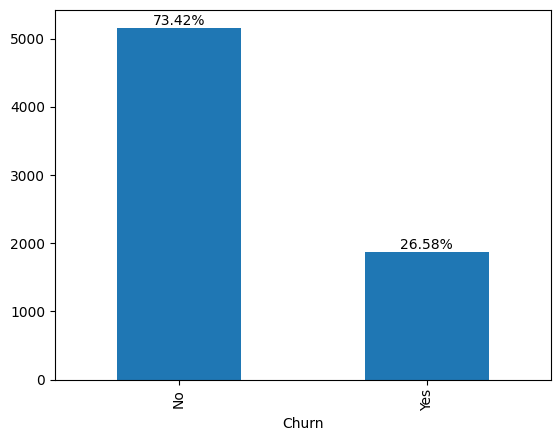

In [25]:
ax = data.groupby(['Churn']).size().plot(kind='bar')
label = data['Churn'].value_counts().apply(lambda x: x*100.0/len(data)).round(2).astype('str') + '%'
for container in ax.containers:
    ax.bar_label(container, labels = label)

The dataset shows a higher percentage of customers who did not churn, indicating that the data is skewed.

array([<Axes: ylabel='Month-to-month'>, <Axes: ylabel='One year'>,
       <Axes: ylabel='Two year'>], dtype=object)

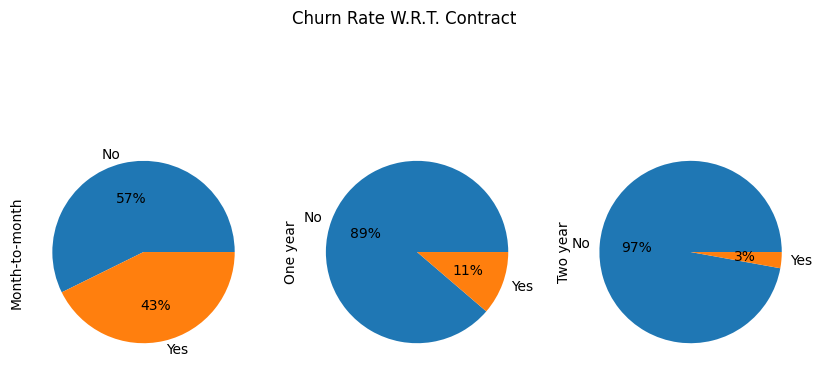

In [26]:
data.groupby(['Churn','Contract']).size().unstack().plot(kind='pie',subplots=True, title='Churn Rate W.R.T. Contract' , autopct='%1.0f%%', figsize=(10, 5), legend = False)

Observations indicate that the majority of customers who churn typically have month-to-month contracts, whereas those with two-year contracts tend to be more loyal.

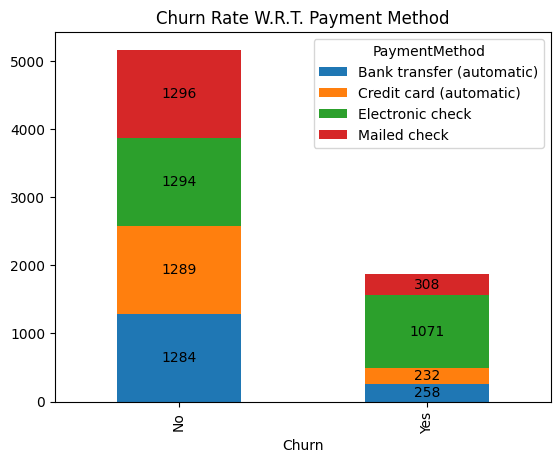

In [27]:
ax = data.groupby(['Churn','PaymentMethod']).size().unstack().plot(kind='bar', title='Churn Rate W.R.T. Payment Method' , stacked = True)
for container in ax.containers:
  labels = [int(v.get_height()) for v in container]
  ax.bar_label(container, labels=labels, label_type='center')

Customers using Electronic Checks as their payment method are significantly more prone to churn compared to those utilizing other payment methods.

Churn
No     Axes(0.125,0.11;0.775x0.77)
Yes    Axes(0.125,0.11;0.775x0.77)
Name: MonthlyCharges, dtype: object

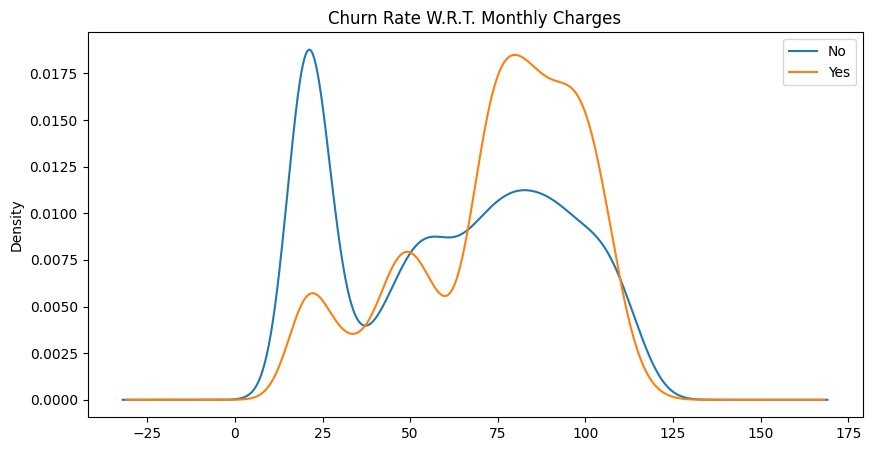

In [28]:
data.groupby(['Churn'])['MonthlyCharges'].plot(kind='density', title='Churn Rate W.R.T. Monthly Charges' , figsize=(10, 5), legend= True)

Customers who incur higher monthly charges tend to have a higher likelihood of churning.

Churn
No     Axes(0.125,0.11;0.775x0.77)
Yes    Axes(0.125,0.11;0.775x0.77)
Name: TotalCharges, dtype: object

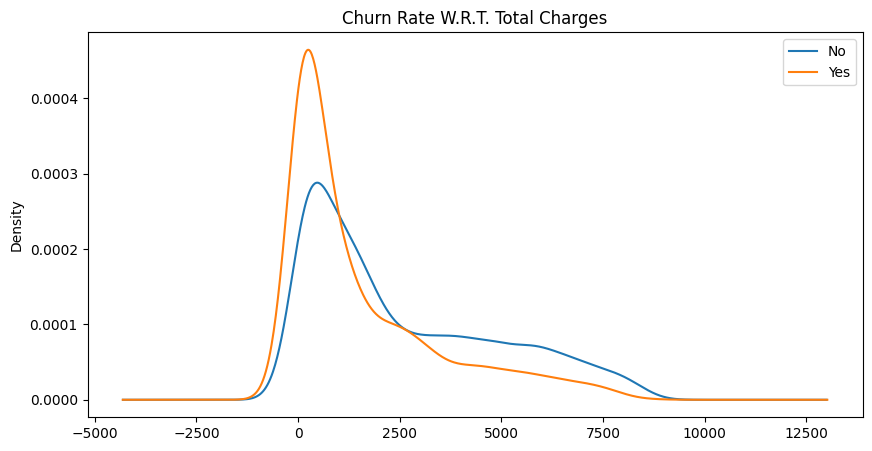

In [29]:
data.groupby(['Churn'])['TotalCharges'].plot(kind='density', title='Churn Rate W.R.T. Total Charges' , figsize=(10, 5), legend= True)

Customers show similar trends when it comes to the Total Charges.

Churn
No     Axes(0.125,0.11;0.775x0.77)
Yes    Axes(0.125,0.11;0.775x0.77)
Name: tenure, dtype: object

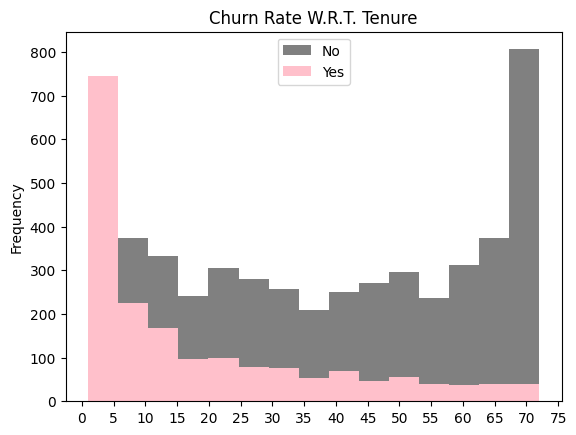

In [30]:
data.groupby(['Churn'])['tenure'].plot(kind='hist', title='Churn Rate W.R.T. Tenure' , legend= True, color= {'Yes':'Pink','No':'grey'}, xticks = np.arange(0,80, step=5), bins=15)

Customers are more prone to churn during the initial months than later on. The churn rate diminishes after a tenure of six months.

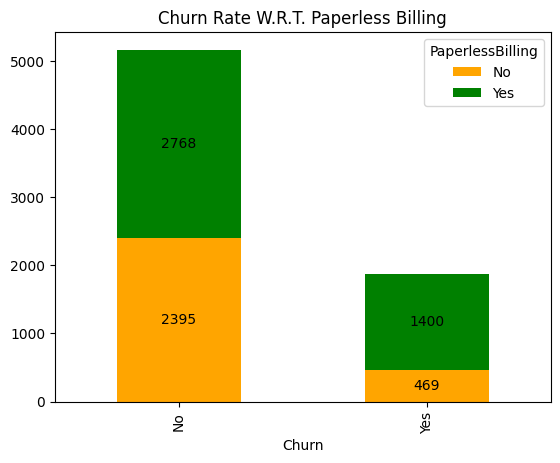

In [31]:
ax = data.groupby(['Churn','PaperlessBilling']).size().unstack().plot(kind='bar', stacked = True, title='Churn Rate W.R.T. Paperless Billing' , color = {"Yes":"Green","No":"Orange"})
for container in ax.containers:
  labels = [int(v.get_height()) for v in container]
  ax.bar_label(container, labels=labels, label_type='center')

Customers who choose paperless billing may be more inclined to churn.

## Churn relation with Demographic features.
Here, by examining demographic characteristics such as gender, age range, marital status, and whether customers have dependents, we aim to identify trends and patterns. This analysis allows us to explore how these features might influence customer behavior and potentially impact churn rates. Understanding these trends is crucial for building a comprehensive model and developing targeted strategies to reduce churn

array([<Axes: ylabel='Female'>, <Axes: ylabel='Male'>], dtype=object)

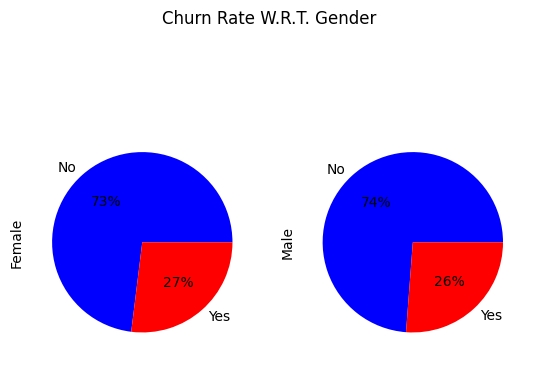

In [32]:
data.groupby(['Churn','gender']).size().unstack().plot(kind='pie',subplots=True, title='Churn Rate W.R.T. Gender' , autopct='%1.0f%%', legend = False, colors =['blue','red'])

The churn rate for both male and female customers shows a very close trend.

In [33]:
data['SeniorCitizen'].replace([1,0],['Yes','No'], inplace=True)

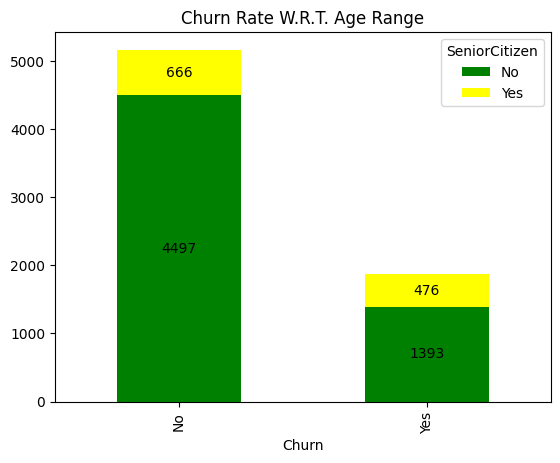

In [34]:
ax = data.groupby(['Churn','SeniorCitizen']).size().unstack().plot(kind='bar', stacked = True, title='Churn Rate W.R.T. Age Range' , color = {'Yes':'yellow','No':'green'})
for container in ax.containers:
  labels = [int(v.get_height()) for v in container]
  ax.bar_label(container, labels=labels, label_type='center')

The data contains a small proportion of senior citizens, but it's noteworthy that nearly half of them end up churning.

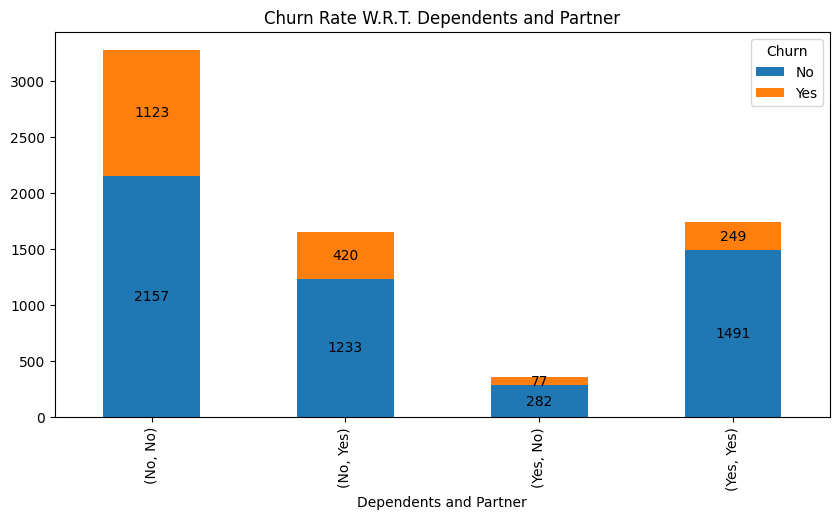

In [35]:
ax = data.groupby(['Dependents', 'Partner', 'Churn']).size().unstack().plot(kind='bar', stacked = True, title='Churn Rate W.R.T. Dependents and Partner' , figsize=(10, 5), xlabel = 'Dependents and Partner')
for container in ax.containers:
  labels = [int(v.get_height()) for v in container]
  ax.bar_label(container, labels=labels, label_type='center')

Customers without dependents and partners are more prone to churn.

## Churn relation with Services taken by customers.
When exploring customer churn, understanding how it correlates with the services that customers use is crucial. By examining the relationship between churn and various services taken by customers—such as internet services, online security, technical support, and others—we can identify key factors contributing to customer attrition. This analysis helps reveal patterns indicating which services are more associated with higher churn rates and which ones might encourage customer retention.

By delving into this relationship, we gain insights into customer behavior and preferences. It also informs potential business strategies for reducing churn by focusing on enhancing or modifying services that are correlated with increased customer loyalty. This exploration plays a significant role in predicting churn and developing effective measures to address it.

array([<Axes: ylabel='DSL'>, <Axes: ylabel='Fiber optic'>,
       <Axes: ylabel='No'>], dtype=object)

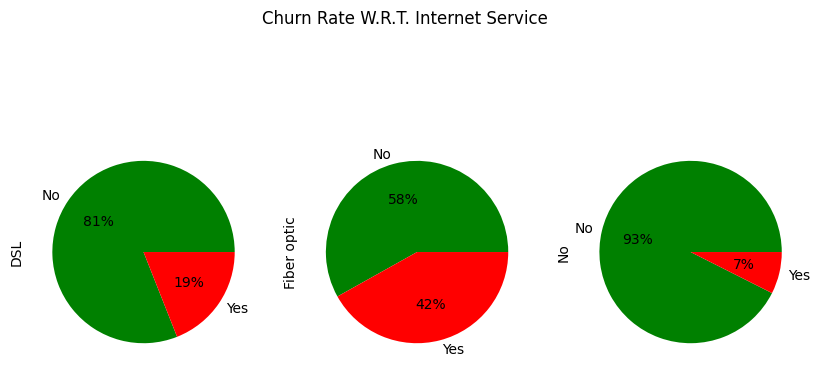

In [36]:
data.groupby(['Churn','InternetService']).size().unstack().plot(kind='pie',subplots=True, title='Churn Rate W.R.T. Internet Service' , autopct='%1.0f%%', figsize=(10, 5), legend = False, colors =['green','red'])

Customers using Fiber Optic internet services exhibit a higher likelihood of churning compared to those using DSL. Conversely, customers with no internet service are less prone to churn.

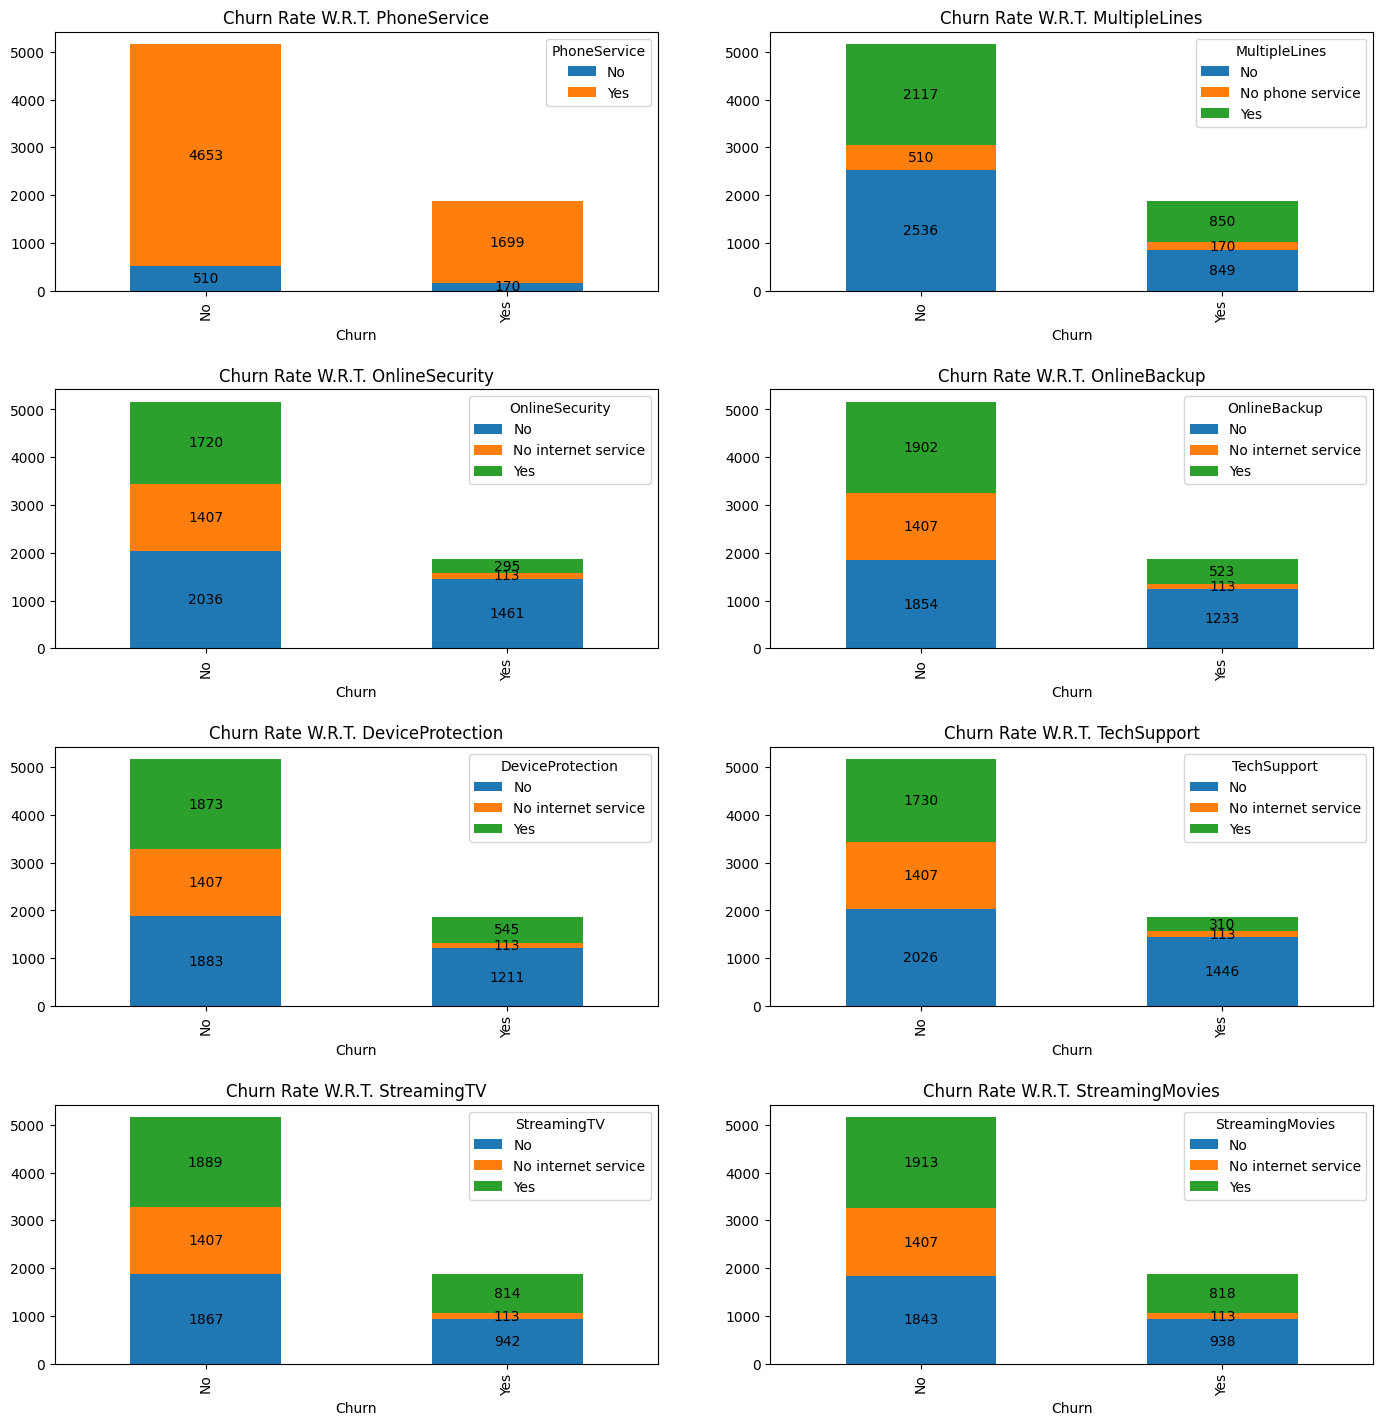

In [37]:
services = ['PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
fig, axes = plt.subplots(4,2,figsize = (15,15))
fig.tight_layout(pad=5.0)
k = 0
for i in range(4):
  for j in range(2):
    ax = data.groupby(['Churn',services[k]]).size().unstack().plot(kind='bar', stacked = True, title='Churn Rate W.R.T. '+services[k], ax=axes[i,j])
    k = k+1
    for container in ax.containers:
      labels = [int(v.get_height()) for v in container]
      ax.bar_label(container, labels=labels, label_type='center')

- Features such as Phone Service and Multiple Lines tend to exhibit similar trends among both Churn and Non-Churn customers.
- The absence of Online Security, Online Backup, Device Protection, or Tech Support makes customers more likely to churn.
- On the other hand, whether customers have Streaming TV or Streaming Movies services appears to have little impact on their likelihood of churning.

###############

# Data Prepration and Model Implementation.
Data preparation and model implementation are critical stages in any data science project. During data preparation, the focus is on cleaning, transforming, and structuring the dataset to ensure it's ready for analysis. This stage involves handling missing values, encoding categorical data, scaling numerical features, and conducting other preprocessing steps necessary for building a reliable model.

Model implementation follows the data preparation phase. This is where you select appropriate machine learning algorithms, train models, and evaluate their performance. This stage also involves tuning model parameters, selecting optimal features, and assessing various performance metrics to ensure the model's accuracy and effectiveness in predicting outcomes.

In this section, we will detail the steps taken to prepare the data and implement the machine learning models used for our analysis. This includes the specific techniques used to clean and preprocess the data, as well as the algorithms and evaluation methods applied to build and validate our predictive models.

In [38]:
def encoding(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

A Label encoder converts the categorical features into numerical data by encoding the labels.

In [39]:
df = data.apply(lambda x: encoding(x))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [40]:
y = df['Churn']
X = df.drop('Churn', axis=1)

Since the data has different features with different range of values, it is important to scale them>

In [41]:
scaler = MinMaxScaler()
column_name = X.columns
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = column_name)
X_scaled.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0.0,1.0,0.0,0.000000,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.115423,0.001275
1,1.0,0.0,0.0,0.0,0.464789,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000,0.385075,0.215867
2,1.0,0.0,0.0,0.0,0.014085,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.354229,0.010310
3,1.0,0.0,0.0,0.0,0.619718,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.000000,0.239303,0.210241
4,0.0,0.0,0.0,0.0,0.014085,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.521891,0.015330


Now lets splitting the data in Train and Test sets for evaluation:

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101)

In [46]:
folder = KFold(n_splits=5)
def classify(model, X_train, y_train):
  model_cross_val = cross_val_score(model , X_train, y_train, cv = folder)
  print("Model: ",model ,"and Cross Validation Score(mean): " , model_cross_val.mean())

In [49]:
rand_grid = RandomForestClassifier()
rand_param_grid = {
    'n_estimators': [100,500,1000],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [10,20,30],
    'criterion' :['gini', 'entropy','log_loss']
}

CV_rand = RandomizedSearchCV(estimator=rand_grid, param_distributions = rand_param_grid)
CV_rand.fit(X_train, y_train)
print(CV_rand.best_params_)

{'n_estimators': 500, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy'}


In [58]:
svc_grid = SVC()
svc_param_grid = {
    'kernel':['linear', 'rbf', 'sigmoid', 'poly'],
    'C':[0.5,1,1.5]
    }

CV_svc = GridSearchCV(estimator=svc_grid, param_grid=svc_param_grid, cv= 5)
CV_svc.fit(X_train, y_train)
print(CV_svc.best_params_)

{'C': 0.5, 'kernel': 'linear'}


In [59]:
GB_grid = GradientBoostingClassifier()
GB_param_grid = {
    'loss' : ['exponential','log_loss'],
    'n_estimators' :[100,300,500],
    'max_depth' : [3,4,5]
}
CV_GB = RandomizedSearchCV(estimator=GB_grid, param_distributions = GB_param_grid)
CV_GB.fit(X_train, y_train)
print(CV_GB.best_params_)

{'n_estimators': 100, 'max_depth': 3, 'loss': 'log_loss'}


In [60]:
model_list = []

#Naive Bayes
clf= MultinomialNB()
model_list.append(clf)

#Logistic Regression
lg = LogisticRegression(C = 1.5, max_iter=200)
model_list.append(lg)

#Random Forest
rf = RandomForestClassifier(n_estimators= 100,criterion = 'gini', max_depth = 10, max_features = 'log2')
model_list.append(rf)

#Support Vector Machine
svm = SVC(C =0.5 ,kernel='linear')
model_list.append(svm)

#KNN
KNN = KNeighborsClassifier()
model_list.append(KNN)

#Gradient Boosting
GB = GradientBoostingClassifier(n_estimators= 100, max_depth= 3, loss = 'log_loss')
model_list.append(GB)

We are utilizing six distinct models, each built on a unique algorithm. The top-performing model among the six will be selected for further evaluation.






## Using all the features:

In [61]:
for model in model_list:
  classify(model,X_train,y_train)

Model:  MultinomialNB() and Cross Validation Score(mean):  0.7805779786224258
Model:  LogisticRegression(C=1.5, max_iter=200) and Cross Validation Score(mean):  0.8004869794890842
Model:  RandomForestClassifier(max_depth=10, max_features='log2') and Cross Validation Score(mean):  0.7943923073748504
Model:  SVC(C=0.5, kernel='linear') and Cross Validation Score(mean):  0.79357764846684
Model:  KNeighborsClassifier() and Cross Validation Score(mean):  0.7494950683009369
Model:  GradientBoostingClassifier() and Cross Validation Score(mean):  0.8004873921835666


The Gradient Boosting Classifier and the Logistic Regression Classifier both perform comparably on the dataset. However, the Gradient Boosting Classifier has a slight edge over Logistic Regression, so we will use it for further evaluation.

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1580
           1       0.64      0.52      0.57       530

    accuracy                           0.81      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.80      0.81      0.80      2110



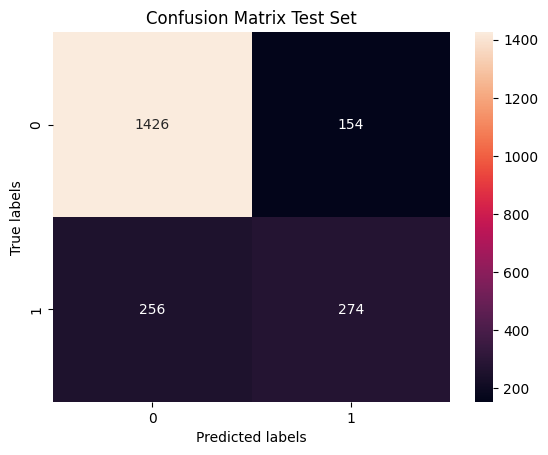

In [62]:
GB =GradientBoostingClassifier()
GB.fit(X_train, y_train)
y_pred = GB.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix Test Set');

The Gradient Boosting Classifier achieved an accuracy of 81% on the test set, demonstrating solid performance in our evaluation.

To balance the dataset, we will use the RandomOverSampler technique, which ensures that both classes have an equal number of entries, achieving a consistent proportion between them.

In [63]:
oversample = RandomOverSampler(random_state = 101)
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

## Using All features and the balanced data:

In [64]:
for model in model_list:
  classify(model,X_train_over,y_train_over)

Model:  MultinomialNB() and Cross Validation Score(mean):  0.7015073078199562
Model:  LogisticRegression(C=1.5, max_iter=200) and Cross Validation Score(mean):  0.735280463200063
Model:  RandomForestClassifier(max_depth=10, max_features='log2') and Cross Validation Score(mean):  0.8336651220824927
Model:  SVC(C=0.5, kernel='linear') and Cross Validation Score(mean):  0.7146287790972115
Model:  KNeighborsClassifier() and Cross Validation Score(mean):  0.7238416835286205
Model:  GradientBoostingClassifier() and Cross Validation Score(mean):  0.7521650943442134


The Random Forest Classifier outperforms other models when working with balanced data. This model's advantage is its ability to handle complex relationships and interactions among features, making it particularly effective when the dataset has been balanced to ensure each class has a similar number of samples. The balancing process allows the Random Forest Classifier to better identify patterns without being biased toward the majority class, leading to improved performance compared to other models.

              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1580
           1       0.52      0.72      0.61       530

    accuracy                           0.77      2110
   macro avg       0.71      0.75      0.72      2110
weighted avg       0.80      0.77      0.78      2110



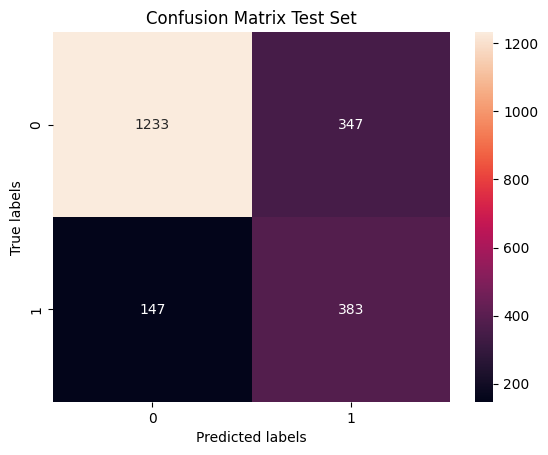

In [65]:
rf = RandomForestClassifier(n_estimators= 500,criterion = 'log_loss', max_depth = 10, max_features = 'sqrt')
rf.fit(X_train_over, y_train_over)
y_pred = rf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix Test Set');

The Random Forest Classifier achieved a 77% accuracy on the test set, which is lower than the accuracy of the Gradient Boosting Classifier when trained on unbalanced data.

## Now lets Use important features

1.   List item
2.   List item



In [66]:
GB_weights = pd.Series(GB.feature_importances_, index=X_train.columns.values)
rf_weights = pd.Series(rf.feature_importances_, index=X_train.columns.values)
weights = pd.concat([GB_weights,rf_weights], axis=1)

In [67]:
weights.sort_values(by=[0], ascending = False)

,0,1
Contract,0.415914,0.172052
tenure,0.142910,0.154375
MonthlyCharges,0.139624,0.133020
TotalCharges,0.095168,0.142518
OnlineSecurity,0.064642,0.059105
TechSupport,0.061792,0.064838
PaymentMethod,0.014812,0.040243
PaperlessBilling,0.014114,0.020382
InternetService,0.013672,0.047950
OnlineBackup,0.010194,0.026923


During the Data Analysis phase, we observed that factors such as Streaming Movies, Streaming TV, Multiple Lines, Phone Service, and Gender have minimal influence on the trend of customer churn.

However, the analysis identified key features that significantly impact churn. These include contract type, customer tenure, type of internet service, monthly charges, payment method, and services like Online Security and Tech Support.

Considering the key features identified by the Gradient Boosting Classifier and Random Forest Classifier, along with insights from the data analysis, we have compiled a list of the 10 most significant features. These features play a crucial role in influencing customer churn.

In [68]:
X_selected_features = X_scaled[['tenure','Contract','MonthlyCharges','TotalCharges','InternetService','OnlineSecurity','TechSupport','PaymentMethod','PaperlessBilling','OnlineBackup']]

In [69]:
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected_features, y, test_size=0.3, random_state=101)

In [70]:
for model in model_list:
  classify(model,X_train_selected,y_train_selected)

Model:  MultinomialNB() and Cross Validation Score(mean):  0.7813889232800957
Model:  LogisticRegression(C=1.5, max_iter=200) and Cross Validation Score(mean):  0.7939855969625687
Model:  RandomForestClassifier(max_depth=10, max_features='log2') and Cross Validation Score(mean):  0.7966276670380917
Model:  SVC(C=0.5, kernel='linear') and Cross Validation Score(mean):  0.791139862160043
Model:  KNeighborsClassifier() and Cross Validation Score(mean):  0.7720453138541539
Model:  GradientBoostingClassifier() and Cross Validation Score(mean):  0.7990664850810945


Now its important to note the Random Forest Classifier and the Gradient Boosting Classifier exhibit comparable performance when applied to the dataset containing the important features.

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1580
           1       0.62      0.52      0.57       530

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



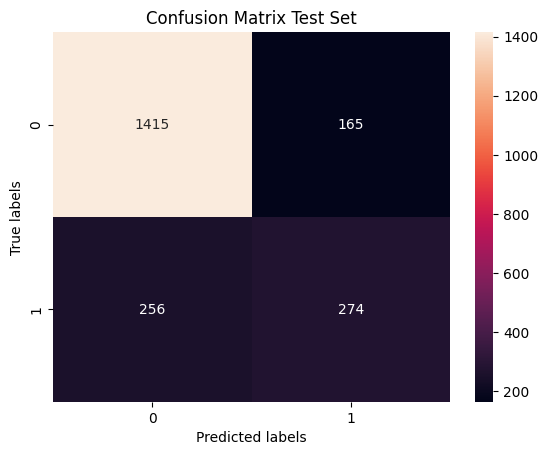

In [71]:
rf_selected_features =  RandomForestClassifier(n_estimators= 500,criterion = 'log_loss', max_depth = 10, max_features = 'sqrt')
rf_selected_features.fit(X_train_selected, y_train_selected)
y_pred = rf_selected_features.predict(X_test_selected)
print(metrics.classification_report(y_test_selected, y_pred))
cm=confusion_matrix(y_test_selected, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix Test Set');

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1580
           1       0.64      0.51      0.57       530

    accuracy                           0.81      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.80      0.81      0.80      2110



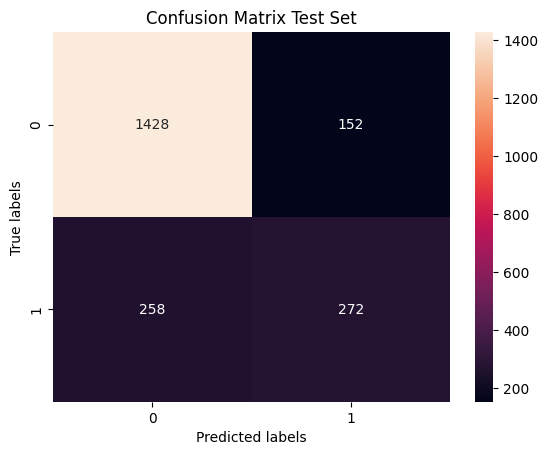

In [72]:
GB_selected_features =  GradientBoostingClassifier()
GB_selected_features.fit(X_train_selected, y_train_selected)
y_pred = GB_selected_features.predict(X_test_selected)
print(metrics.classification_report(y_test_selected, y_pred))
cm=confusion_matrix(y_test_selected, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix Test Set');

The Random Forest Classifier achieves an 81% accuracy on the test set when trained on important features. This outperforms the Random Forest Classifier trained on balanced data, which attained a 77% accuracy. However, it falls slightly short of the accuracy achieved by the Gradient Boosting Classifier trained on unbalanced data (81%). Meanwhile, the Gradient Boosting Classifier demonstrates consistent performance across both all features data and important features data, achieving an 81% accuracy in both cases.

####################

# Final Report: TELCO-CHURN PREDICTION WITH DATA SCIENCE

## Introduction
The aim of this project was to predict customer churn using a telecommunications dataset. We analyzed the data, implemented machine learning models, and identified the most significant factors influencing churn. This report summarizes our final findings and results.

## Data Analysis
In the exploratory data analysis (EDA) phase, we explored various customer demographics, services used, and contract details. We identified several features that had minimal impact on churn, including Streaming Movies, Streaming TV, Multiple Lines, Phone Service, and Gender. However, features like contract type, tenure, internet service, monthly charges, payment method, and services like Online Security and Tech Support showed a strong correlation with customer churn.

## Model Selection
We used a combination of Gradient Boosting Classifier and Random Forest Classifier to identify the most important features for predicting churn. Our final list included the top 10 features from both classifiers, along with insights from the EDA.

## Model Performance
We evaluated multiple machine learning models to predict customer churn. Below is a summary of our results:

- **Random Forest Classifier on Important Features**: This model achieved an accuracy of 81% on the test set, outperforming the Random Forest Classifier trained on balanced data (77%). However, it was slightly less accurate than the Gradient Boosting Classifier trained on unbalanced data (81%).

- **Gradient Boosting Classifier**: This classifier demonstrated consistent performance, achieving 81% accuracy across various datasets, including the one with all features and the one with important features.

## Conclusion
Our final findings indicate that the Gradient Boosting Classifier is the most reliable model for predicting customer churn, providing consistent results across different datasets. The Random Forest Classifier, when trained on key features, also performed well, reaching an accuracy of 81%.

These results suggest that focusing on important features, rather than using a balanced dataset, can lead to better model performance. Furthermore, the significant features identified during our analysis provide actionable insights for business strategies aimed at reducing customer churn.

Overall, this project underscores the importance of feature selection and model tuning in creating effective churn prediction models. The results also highlight the value of using Gradient Boosting Classifier for consistent and robust predictions.